# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [22]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings # for muting warning messages
# mute warning messages
warnings.filterwarnings('ignore')

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [3]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))

_(ii)_ What concept ‘defines’ the plotted line?

## Answers  
_(i)_ The median value `medv` of owner-occupied homes in $1000s.  
    The wieghted mean of distances `dis` to five Boston employment centers.  

_(ii)_ The regression line showing the relationship between `medv` and `dis`

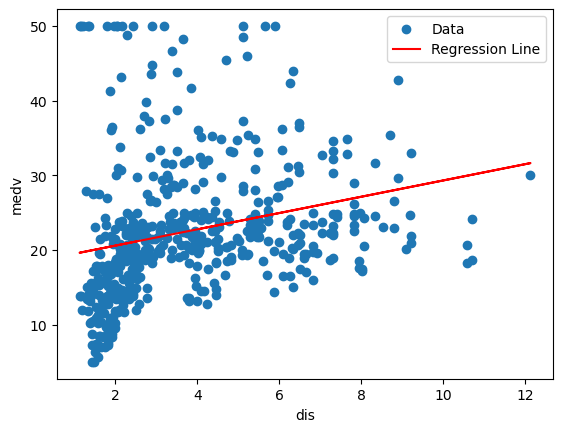

In [4]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?

_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

## Answer
_(iii)_ The null hypoothesis is that there is no relation between the owner occupied home and the distance from the main five employment centers.  
The alternate hypothesis is that there is some relationship between the owner occupied home and the distance from the main five employment centers.

In [35]:
# Add your code here
X =  pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                   'dis':Boston['dis']})
X_const = sm.add_constant(X)
y = Boston['medv']
model = sm.OLS(y, X) # to specify the model
results = model.fit() # to fit the model

In [36]:
summarize(results)

,coef,std err,t,P>|t|
intercept,18.3901,0.817,22.499,0.0
dis,1.0916,0.188,5.795,0.0


Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  
_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  
_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  


## Answers
_(v)_ The _coefficient estimates_ for $B_0$ (intercept)  = 18.39 and $B_1$ (slope) = 1.09  
_(vi)_ The _standard errors_ for $B_0$ = 0.817 and $B_1$ = 0.188  
_(vii)_ The _confidence intervals_ for $B_0$ is  from 16.78 to 19.99 and for $B_1$ is from 0.72 to 1.46 as shown on the below cell. 

In [18]:
# Your answer here
conf_interval = results.conf_int()
print(conf_interval)

                   0          1
intercept  16.784179  19.995997
dis         0.721509   1.461717



Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)  
_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value).  

In [24]:
results.f_pvalue

1.2066117273371726e-08

In [19]:
# Your answer here
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        23:47:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     18.3901      0.817     22.499      0.0

## Answer 
_(viii)_ Based on the above summary, we see that the R-squared is above 0.6 which is a moderate value suggesting that the model is agood fit.  
_(ix)_ Since the p_value of the above moel is well below the significance level (0.05) and f-statistic is relatively large (33.58) > 1 we can safely conclude that we can reject the null hypothesis

### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [41]:
# Add your code here
y = Boston['medv']
X = MS(['dis', 'rm']).fit_transform(Boston)
X_Const_Mul = sm.add_constant(X)
model2 = sm.OLS(y,X_Const_Mul)
results_dis_rm =  model2.fit()
summarize(results_dis_rm)

,coef,std err,t,P>|t|
intercept,-34.6361,2.621,-13.212,0.000
dis,0.4888,0.141,3.459,0.001
rm,8.8014,0.424,20.780,0.000


_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?


## Answers  

_(ii)_ The null hypothesis is: There is no linear regression relationship between the independent variable `dis` and `rm` and the dependent variable `medv`.  
Similarly the alternative hypothesis states that variation of `dis` or `rm` has a significant linear relationship in the determination of the value of `medv`.

In [25]:
results_dis_rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.84e-75
Time:                        10:53:32   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -34.6361      2.621    -13.212      0.000     -39.786     -29.486
dis            0.4888      0.141      3.459      0.001       0.211       0.767
rm             8.8014      0.424     20.780      0.000       7.969       9.634
==============================================================================
Omnibus:                      142.807   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.520
Skew:                           1.090   Prob(JB):                    4.12e-184
Kurtosis:                       8.942   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_(iii)_ Based on the above summary we see that the p-value for both `dis` and `rm` is well below the signifacnce level. We can safely conclude that both these values are predictive of `medv`


_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?

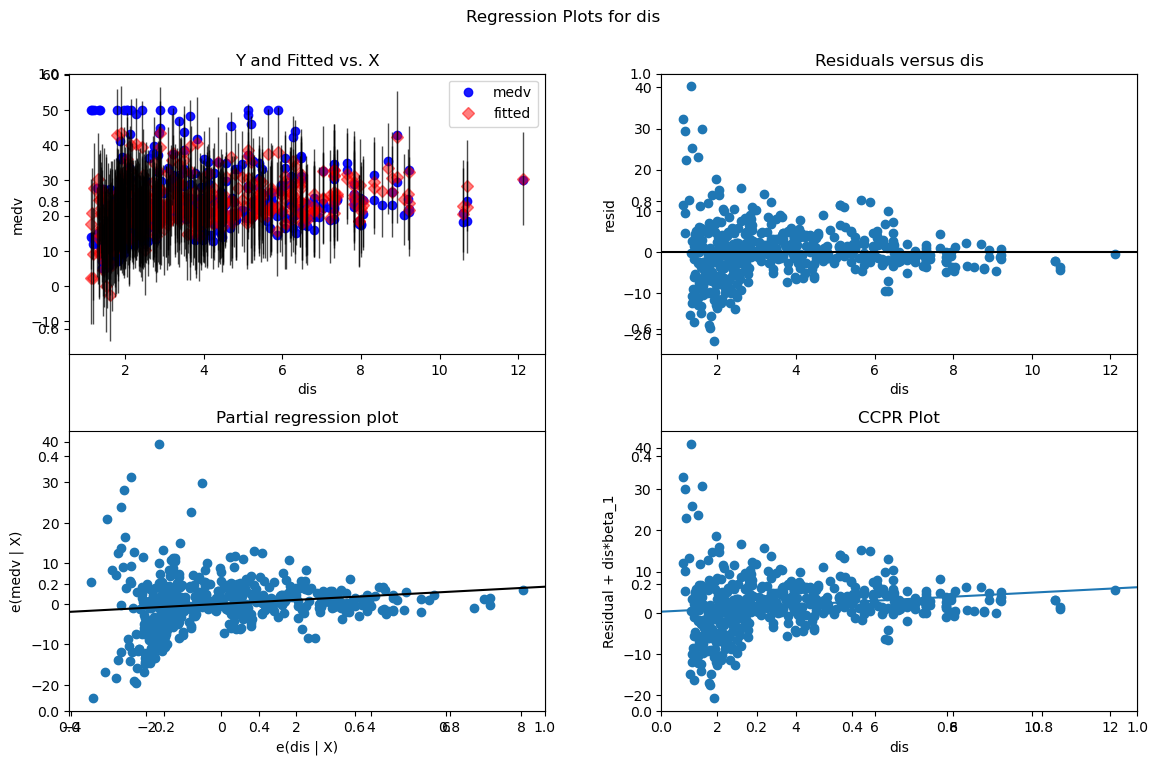

In [48]:
# Add your code here
# Plot the specified diagnostic plots
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

sm.graphics.plot_regress_exog(results_dis_rm, 'dis', fig=fig)
plt.show()


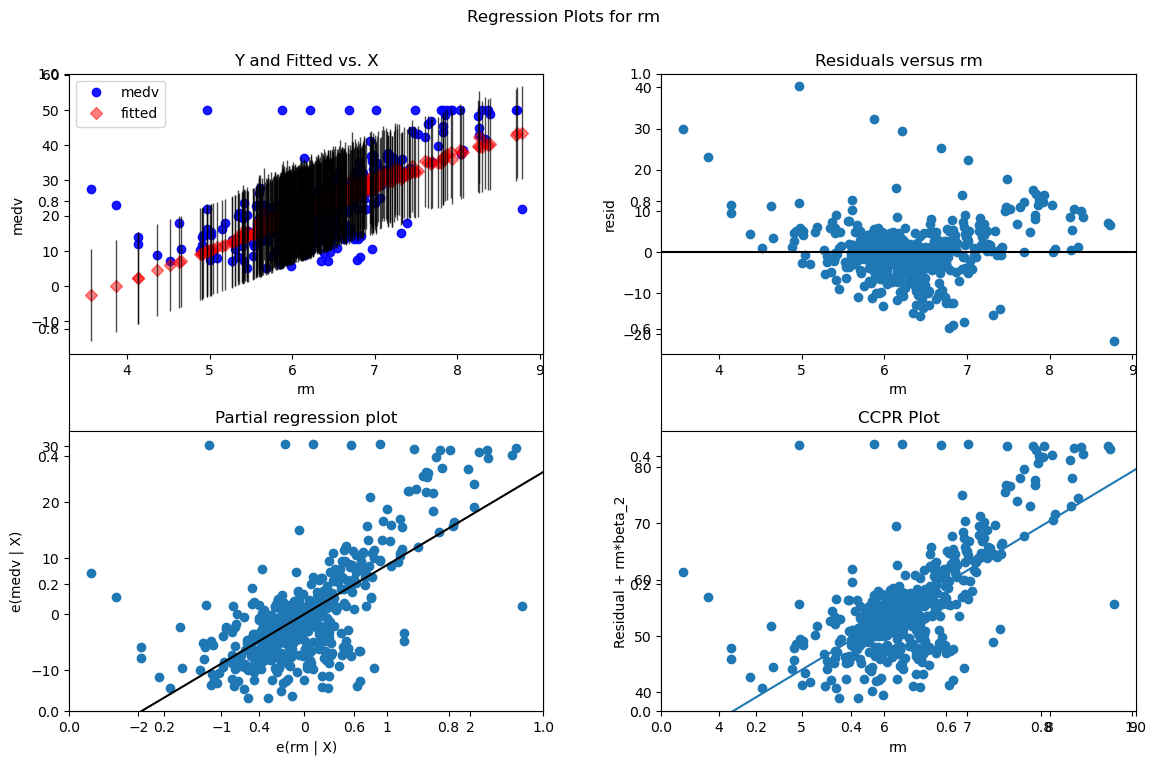

In [50]:
fig2, ax2 = plt.subplots(1, 2, figsize=(12, 8))
sm.graphics.plot_regress_exog(results_dis_rm, 'rm', fig=fig2)
plt.show()

## Answer 
_(iv)_ The outliers are in the range rm =  4-5 and 8-9 in these ranges there are several actual observed values which are significantly above or below the fitted values.  

_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

In [61]:
# Add your code here
model3 = sm.OLS.from_formula('medv ~ crim * lstat', data=Boston)
result_with_int =  model3.fit()

print(result_with_int.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           4.94e-88
Time:                        15:18:15   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.0292      0.616     56.905      0.0

## Answer 
_(v)_ Although `crim` and `lstat` indivudually have negative impact on `medv` i.e. for a unit increase in `crim`, `medv` decreases by $362 and for a unit increse in `lstat` `medv`decreases by $968 however thier combined effect is less sever. For each unit increase in both `crim` and `lstat`, `medv` actually increases by $14.50  

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
